**LGMVIP- Data Science Internship -july2023** <br>

**Task 6- Prediction Using Decision Tree Algorithm <br>**

**Author Name - Roshan Raj <br>**


Importing Libraries

In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Loadind Datset

df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Exploratory Data Analysis and Visualization

df.shape


(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no any missing value in our dataset as wll.<br>

let's see the distribution of our target features i.e species

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

There are equal number of tuples for all classes of species . Thus our loaded dataset is balanced dataset.<br>

let's check for noisy tuples in our datasets

In [11]:
print(f"minimum value:\n{df.min()}")

minimum value:
Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object


In [12]:
print(f"minimum value:\n{df.max()}")

minimum value:
Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object


In [13]:
print(f"minimum value:\n{df.mean(numeric_only=True)}")

minimum value:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64


In [22]:
#Removing ID coloumn from our dataset
df.drop(columns='Id', inplace = True)

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<ipython-input-26-60c383085db1>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0.98, 'Features distribution analysis of iris species')

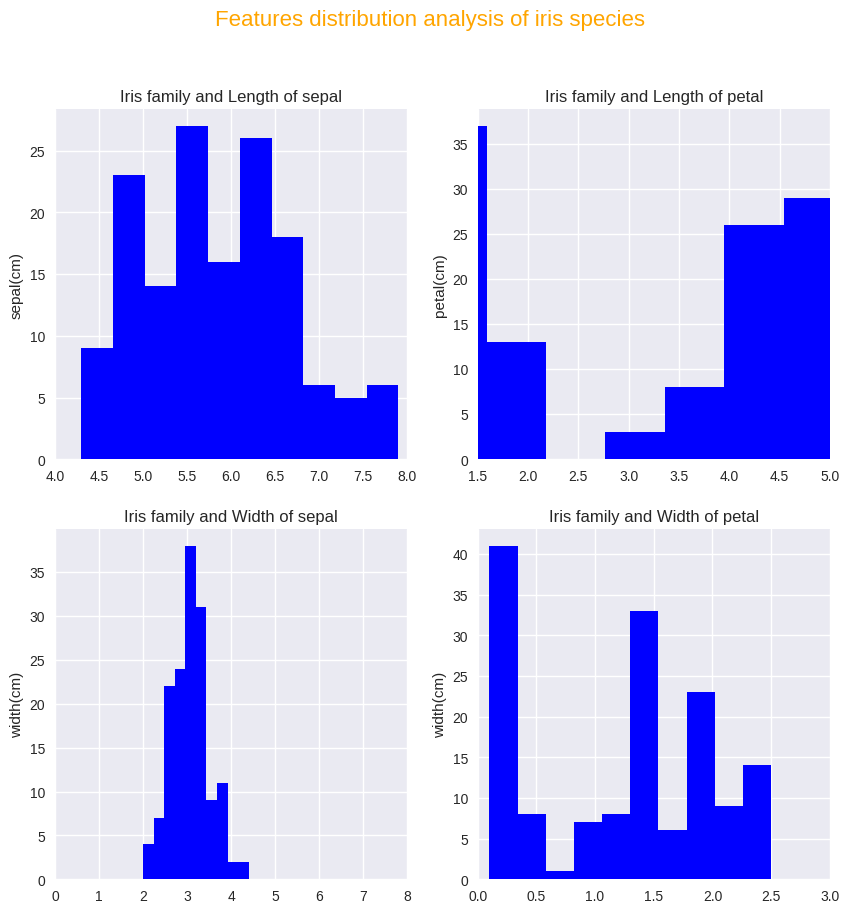

In [26]:
#visualization

plt.style.use('seaborn')
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))

ax0.hist(df["SepalLengthCm"], color='blue')
ax0.set_xlim(4,8)
ax0.set(title = 'Iris family and Length of sepal', ylabel = 'sepal(cm)')


ax1.hist(df["PetalLengthCm"], color='blue')
ax1.set_xlim(1.5,5)
ax1.set(title = 'Iris family and Length of petal', ylabel = 'petal(cm)')


ax2.hist(df["SepalWidthCm"], color='blue')
ax2.set_xlim(0,8)
ax2.set(title = 'Iris family and Width of sepal', ylabel = 'width(cm)')


ax3.hist(df["PetalWidthCm"], color='blue')
ax3.set_xlim(0,3)
ax3.set(title = 'Iris family and Width of petal', ylabel = 'width(cm)')


#adding title to figure

fig.suptitle("Features distribution analysis of iris species",
             fontsize =16, color = 'orange')



correlation matrix & heatmap

In [27]:
corr = df.corr()
corr

<ipython-input-27-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 0.98, 'HeatMap')

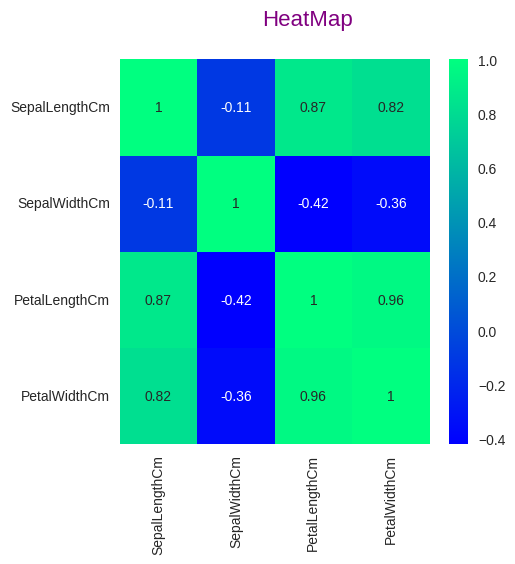

In [30]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap='winter',ax=ax )
fig.suptitle(t='HeatMap', color = 'purple', fontsize = 16)

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

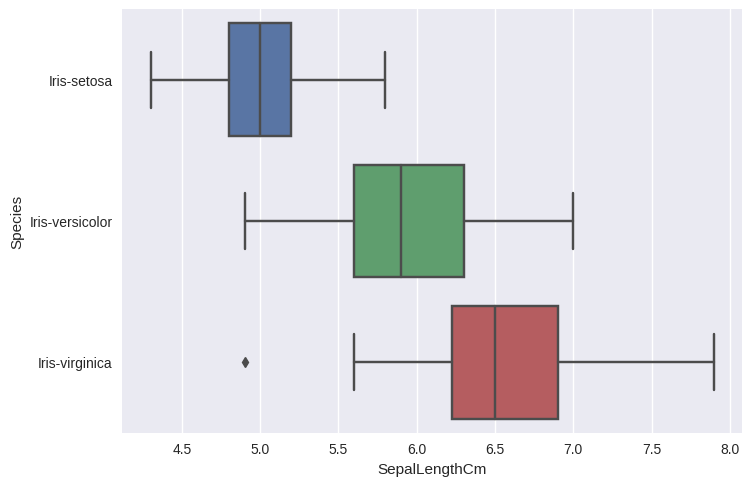

In [31]:
#box-plot

sns.boxplot(x ='SepalLengthCm', y='Species',data=df)

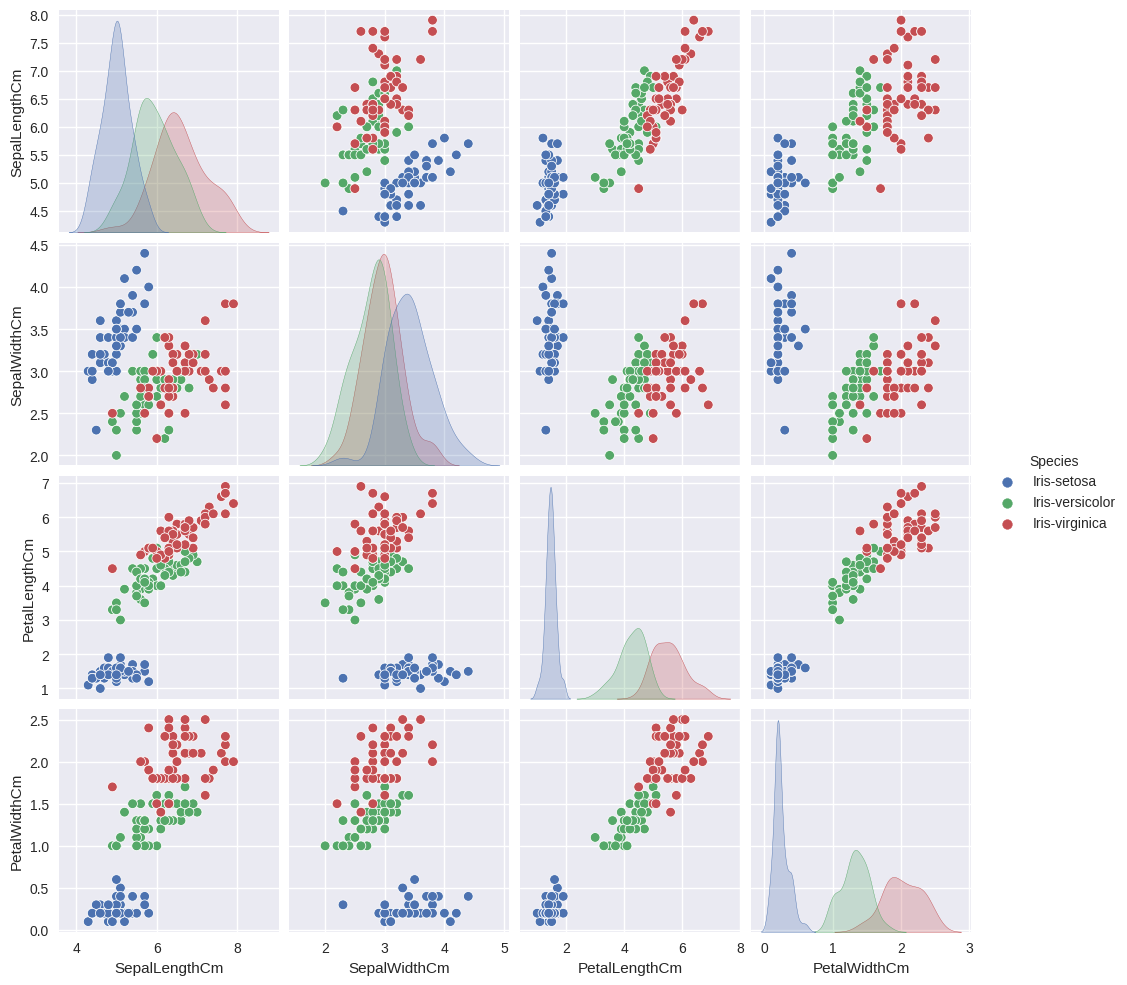

In [32]:
#pair-plot
sns.pairplot(data=df, hue='Species')

Decision Tree ML Model Implementaion

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Species'],axis = 1), df['Species'], test_size=0.2, random_state = 80)

In [35]:
dec= DecisionTreeClassifier()
dec.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'Petalwidth <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [37, 39, 44]\nclass = Iris-virginica'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(0.5769230769230769, 0.7, 'Petalwidth <= 1.75\ngini = 0.498\nsamples = 83\nvalue = [0, 39, 44]\nclass = Iris-virginica'),
 Text(0.3076923076923077, 0.5, 'Petallength <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.3, 'Petalwidth <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.46153846153846156, 0.3, 'Petalwidth <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Iris-virginica'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 

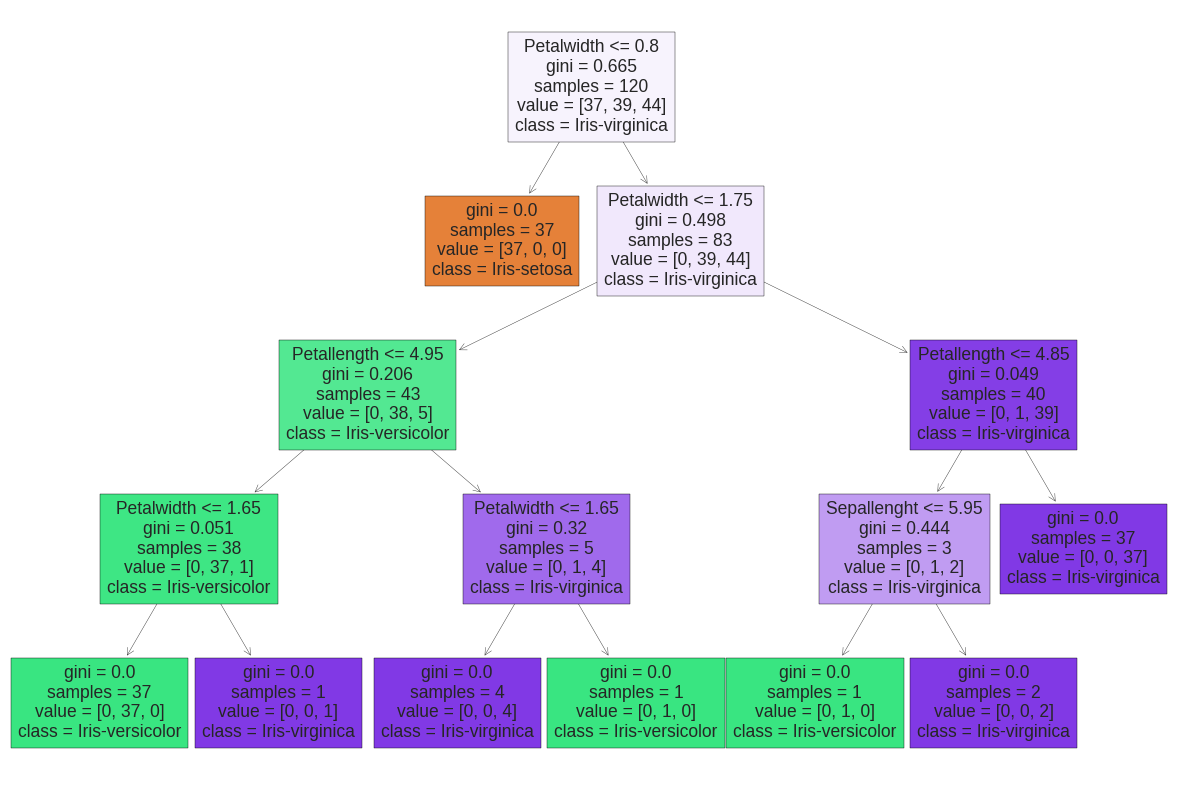

In [38]:
from sklearn import tree
plt.figure(figsize=(15,10))
feature = ['Sepallenght', 'Sepalwidth', 'Petallength', 'Petalwidth']
classes = df.Species.unique()
tree.plot_tree(dec, feature_names = feature, class_names=classes, filled =True)

In [39]:
x_test_predict = dec.predict(x_test)
x_test_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [40]:
#findind accuracy

model_accuracy = accuracy_score(y_test, x_test_predict)
model_accuracy

0.9666666666666667